In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet


In [232]:
df = pd.read_csv("https://raw.githubusercontent.com/rajaganesh1357/Dataset/main/linear%20regression%20dataset.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia


In [233]:
df.shape[0]

244

In [234]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,Sidi-Bel Abbes


In [235]:
df.drop(165,inplace=True)
df.reset_index(inplace=True)

In [236]:
df.shape[0]

243

In [237]:
df['date'] = pd.to_datetime(df[['day', 'month', 'year']])

In [238]:
df.drop(['day', 'month', 'year'], axis = 1, inplace = True)

In [239]:
df.head()

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia,2012-06-01
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia,2012-06-02
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia,2012-06-03
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia,2012-06-04
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia,2012-06-05


In [240]:
df.isnull().sum()

index          0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
date           0
dtype: int64

In [241]:
df.columns.to_list()

['index',
 'Temperature',
 ' RH',
 ' Ws',
 'Rain ',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes  ',
 'Region',
 'date']

In [242]:
df.columns = df.columns.str.strip()
df.columns

Index(['index', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI',
       'BUI', 'FWI', 'Classes', 'Region', 'date'],
      dtype='object')

In [243]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [244]:
import re
def Remove_Extra_Space(x):
  return (re.sub(' +', ' ', x).strip())

In [245]:
df['Classes'] = df['Classes'].apply(Remove_Extra_Space)

In [246]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [247]:
df['Classes'] = df['Classes'].map({'not fire' : 0, 'fire': 1})

In [248]:
df['Region'].unique()

array(['Bejaia', 'Sidi-Bel Abbes'], dtype=object)

In [249]:
df['Region'] = df['Region'].map({'Bejaia' : 0, 'Sidi-Bel Abbes': 1})

In [250]:
df['Region'].unique()

array([0, 1])

In [251]:
df.dtypes

index                   int64
Temperature             int64
RH                      int64
Ws                      int64
Rain                  float64
FFMC                  float64
DMC                   float64
DC                     object
ISI                   float64
BUI                   float64
FWI                    object
Classes                 int64
Region                  int64
date           datetime64[ns]
dtype: object

In [252]:
print(df['date'].min())
print(df['date'].max())

2012-06-01 00:00:00
2012-09-30 00:00:00


In [253]:
def date_imputation(x):
  if (x >= pd.to_datetime('2012-07-01')) and (x <= pd.to_datetime('2012-09-01')):
    return 1
  else:
    return 0
df['date'] = df['date'].apply(date_imputation)

In [254]:
convert_data = {'date':'int'}
df = df.astype(convert_data)

Text(0.5, 1.0, 'Outliers')

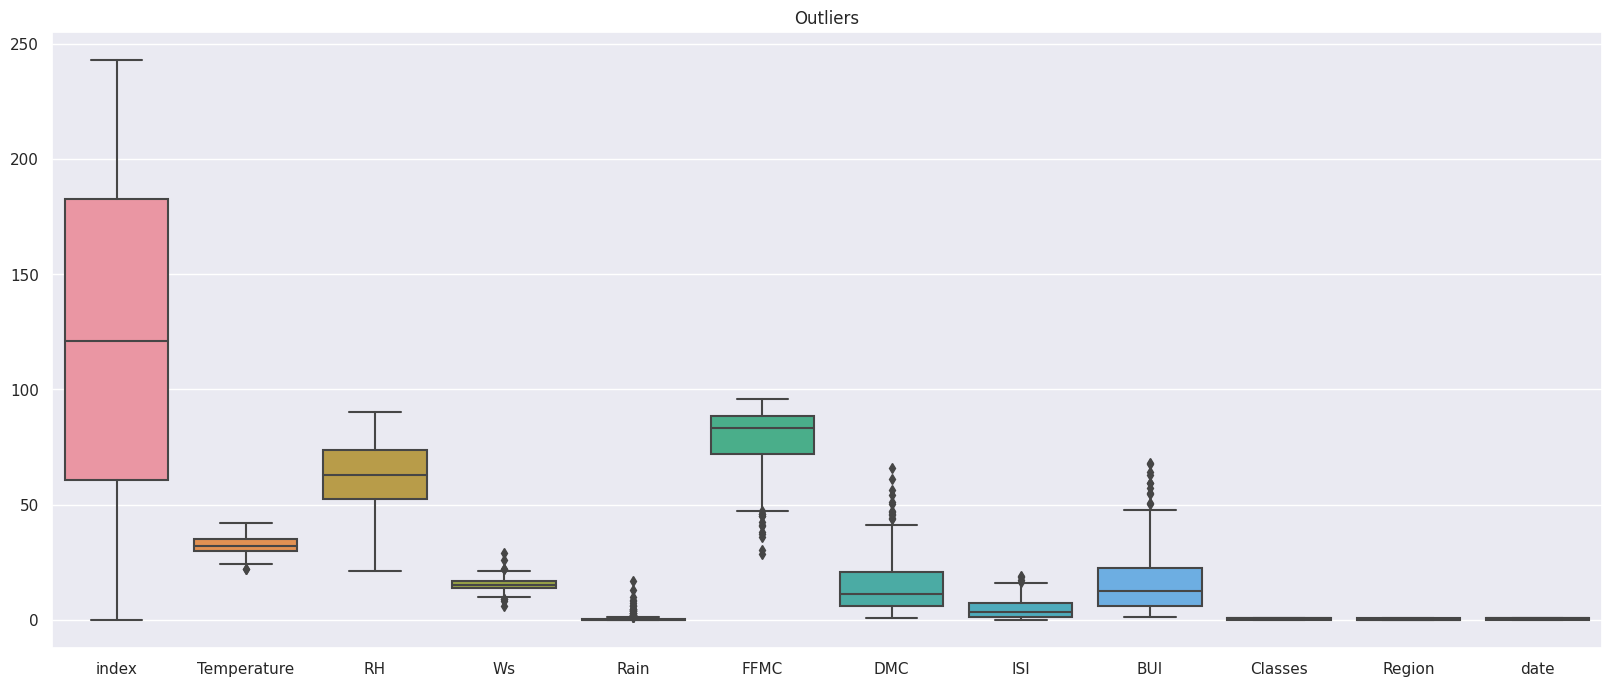

In [255]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df)
plt.title("Outliers")

In [256]:
data = round(df.corr(),2)

<ipython-input-256-7fa1301b2e46>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = round(df.corr(),2)


In [257]:
data[abs(data['index'])>0.3].index

Index(['index', 'RH', 'Region'], dtype='object')

<Axes: >

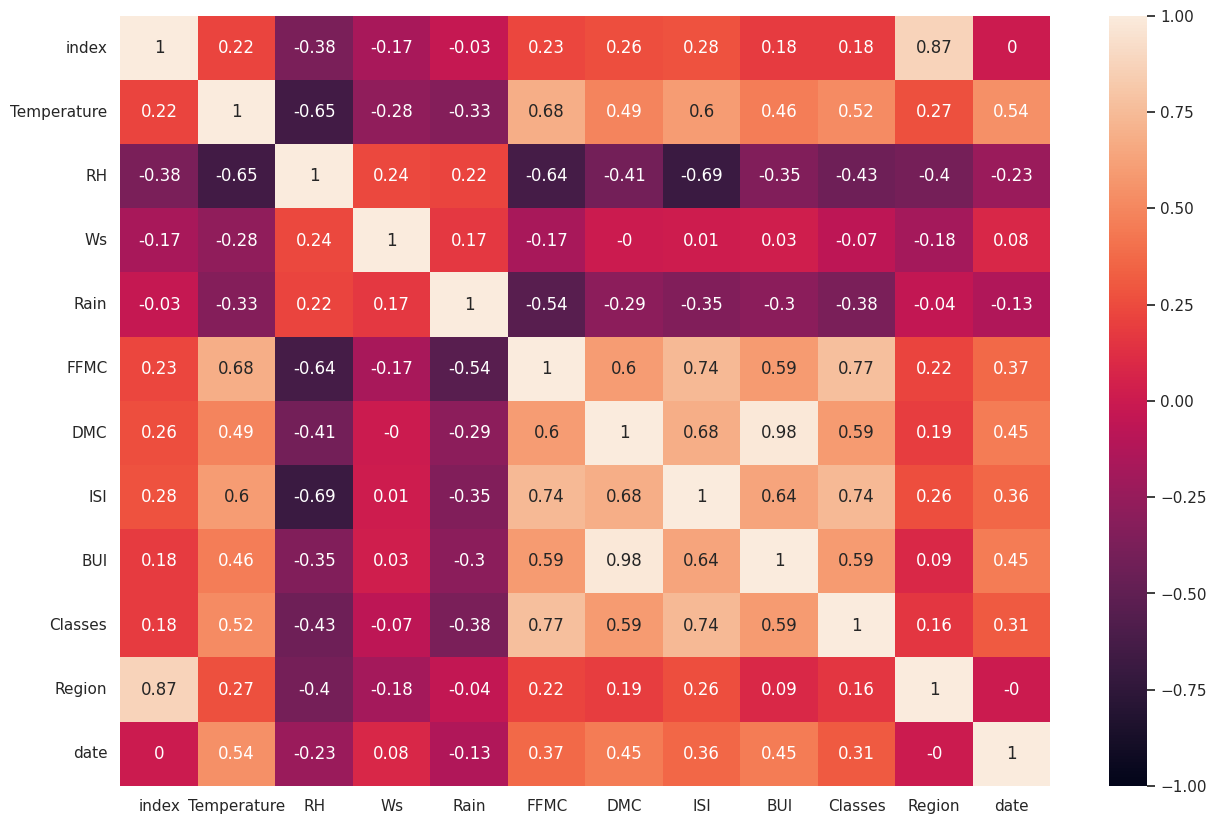

In [258]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=data, annot=True, vmin=-1, vmax=1)

In [259]:
df.dtypes

index            int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC              object
ISI            float64
BUI            float64
FWI             object
Classes          int64
Region           int64
date             int64
dtype: object

In [260]:
X= df[['RH', 'Ws', 'Rain','FFMC', 'DMC', 'ISI','DC','FWI', 'Classes', 'Region','date']]
#X= df[['index', 'RH', 'Region']]
y=df[['Temperature']]

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [262]:
df['date'].unique()

array([0, 1])

In [263]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [264]:
linear_reg=LinearRegression()

In [265]:
linear_reg.fit(X_train, y_train)

LinearRegression()

In [266]:
print("1. Co-efficients of independent features is {}".format(linear_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(linear_reg.intercept_))

1. Co-efficients of independent features is [[-1.10245656 -0.74292062  0.19619386  1.26997166 -0.68042192 -0.12814873
   0.36309472  0.56798799 -0.14207303  0.18981881  1.28697478]]
2. Intercept of best fit hyper plane is [32.09876543]


In [267]:
linear_reg_pred=linear_reg.predict(X_test)

In [268]:
residual_linear_reg=y_test-linear_reg_pred
residual_linear_reg = pd.DataFrame(residual_linear_reg)

Text(0, 0.5, 'Predicted data')

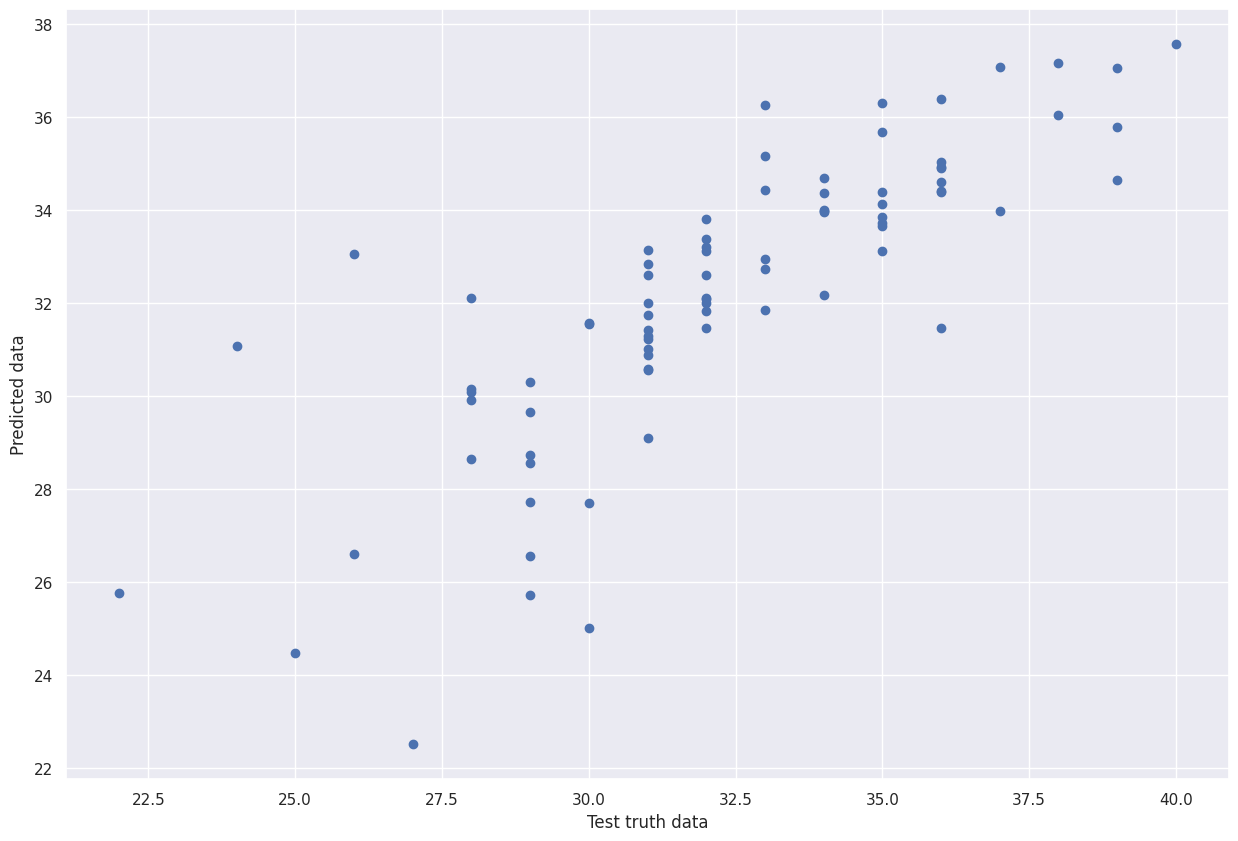

In [269]:
plt.scatter(x=y_test,y=linear_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

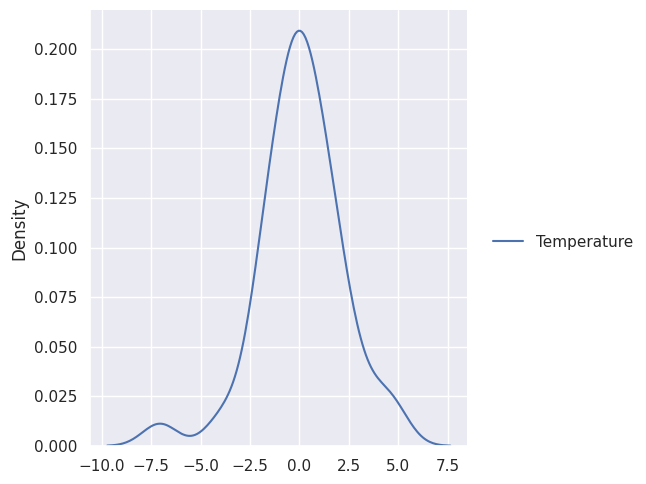

In [270]:
sns.displot(data=residual_linear_reg, kind='kde')

Text(0, 0.5, 'Residuals')

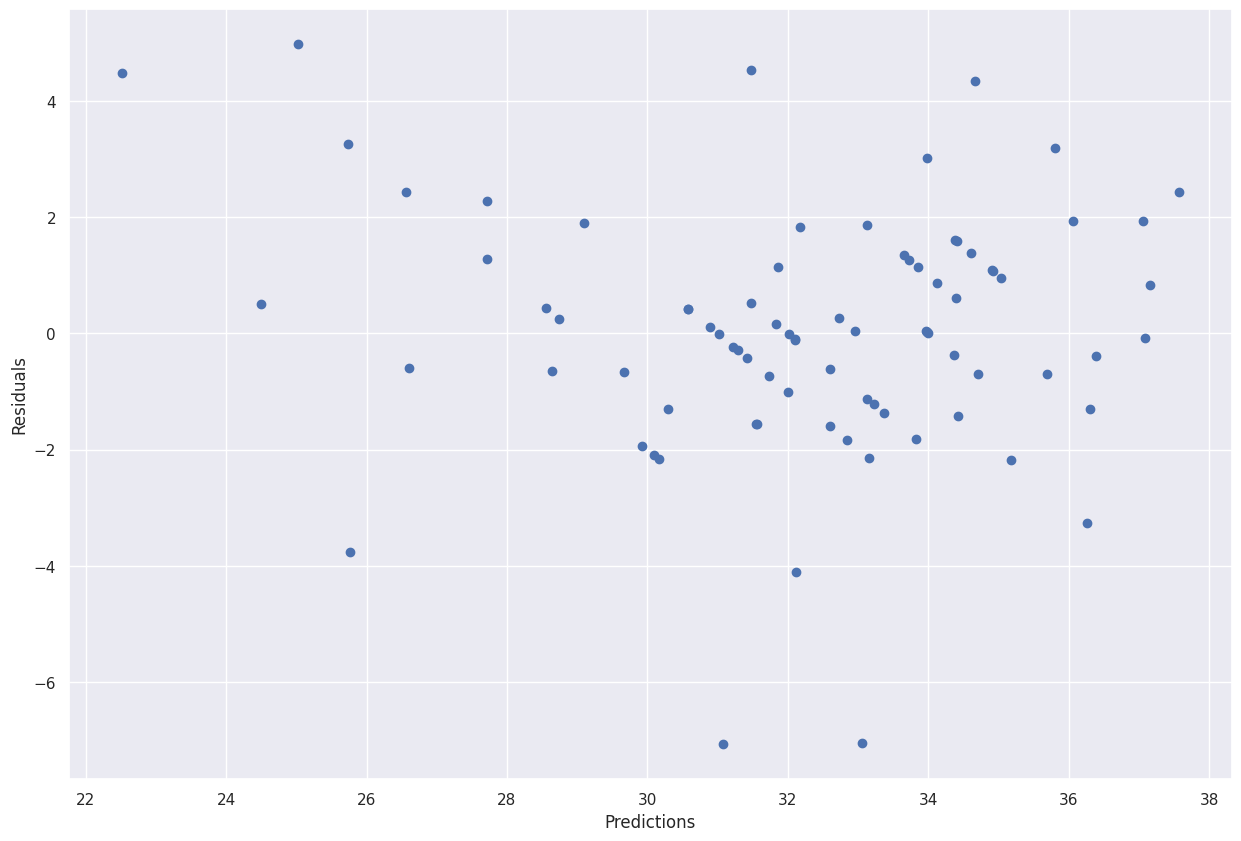

In [271]:
plt.scatter(x=linear_reg_pred, y=residual_linear_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

In [272]:
print(f"MSE: {round(mean_squared_error(y_test, linear_reg_pred), 2)}")
print(f"MAE: {round(mean_absolute_error(y_test, linear_reg_pred), 2)}")
print(f"RMSE: {round(np.sqrt(mean_squared_error(y_test, linear_reg_pred)), 2)}")


MSE: 4.48
MAE: 1.52
RMSE: 2.12


In [273]:
linear_reg_r2_score = r2_score(y_test, linear_reg_pred)
linear_reg_adj_r2_score = 1 - ((1 - linear_reg_r2_score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

print(f"R-Squared Accuracy: {round(linear_reg_r2_score * 100, 3)}%")
print(f"Adjusted R-Squared Accuracy: {round(linear_reg_adj_r2_score * 100, 2)}%")


R-Squared Accuracy: 65.086%
Adjusted R-Squared Accuracy: 59.52%


In [274]:
ridge_reg=Ridge()
ridge_reg

Ridge()

In [275]:
ridge_reg.fit(X_train, y_train)

Ridge()

In [276]:
print("1. Co-efficients of independent features is {}".format(ridge_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(ridge_reg.intercept_))

1. Co-efficients of independent features is [[-1.10314142 -0.73922776  0.18584915  1.22777542 -0.56931076 -0.02412461
   0.3452454   0.40517221 -0.12084501  0.17629411  1.27159121]]
2. Intercept of best fit hyper plane is [32.09876543]


In [277]:
ridge_reg_pred=ridge_reg.predict(X_test)

In [278]:
residual_ridge_reg=y_test-ridge_reg_pred
residual_ridge_reg = pd.DataFrame(residual_ridge_reg)

Text(0, 0.5, 'Predicted data')

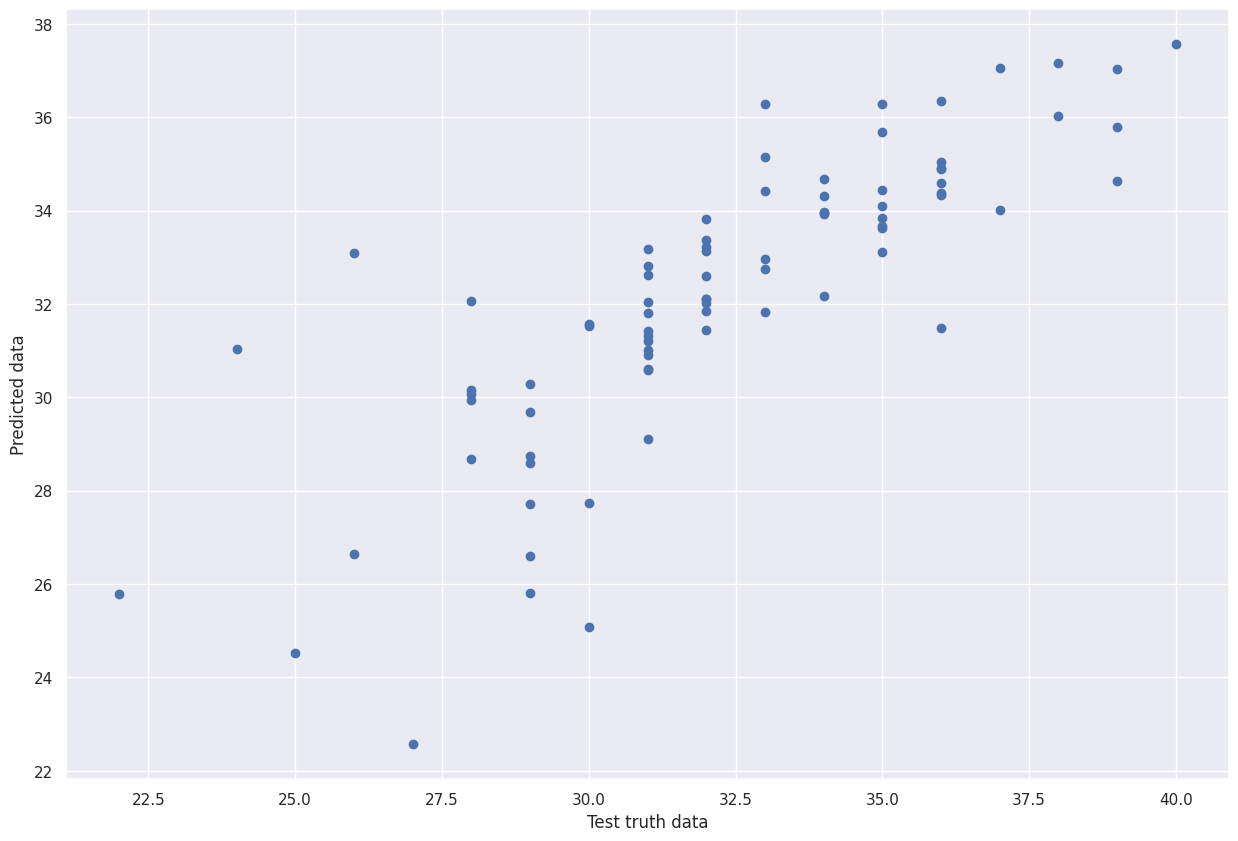

In [279]:
plt.scatter(x=y_test,y=ridge_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

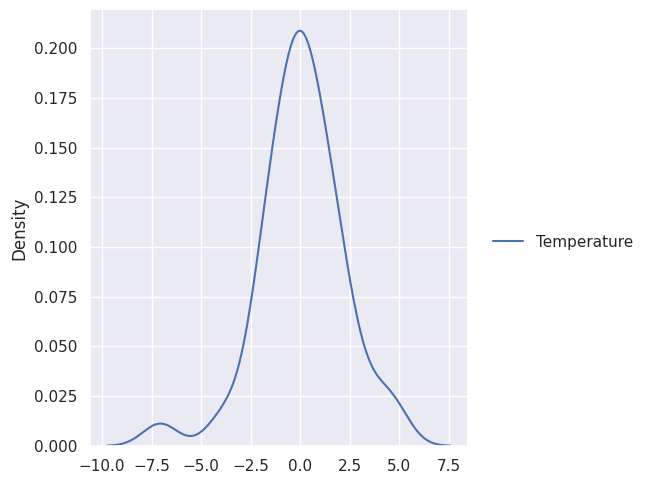

In [280]:
sns.displot(data = residual_ridge_reg, kind='kde')

Text(0, 0.5, 'Residuals')

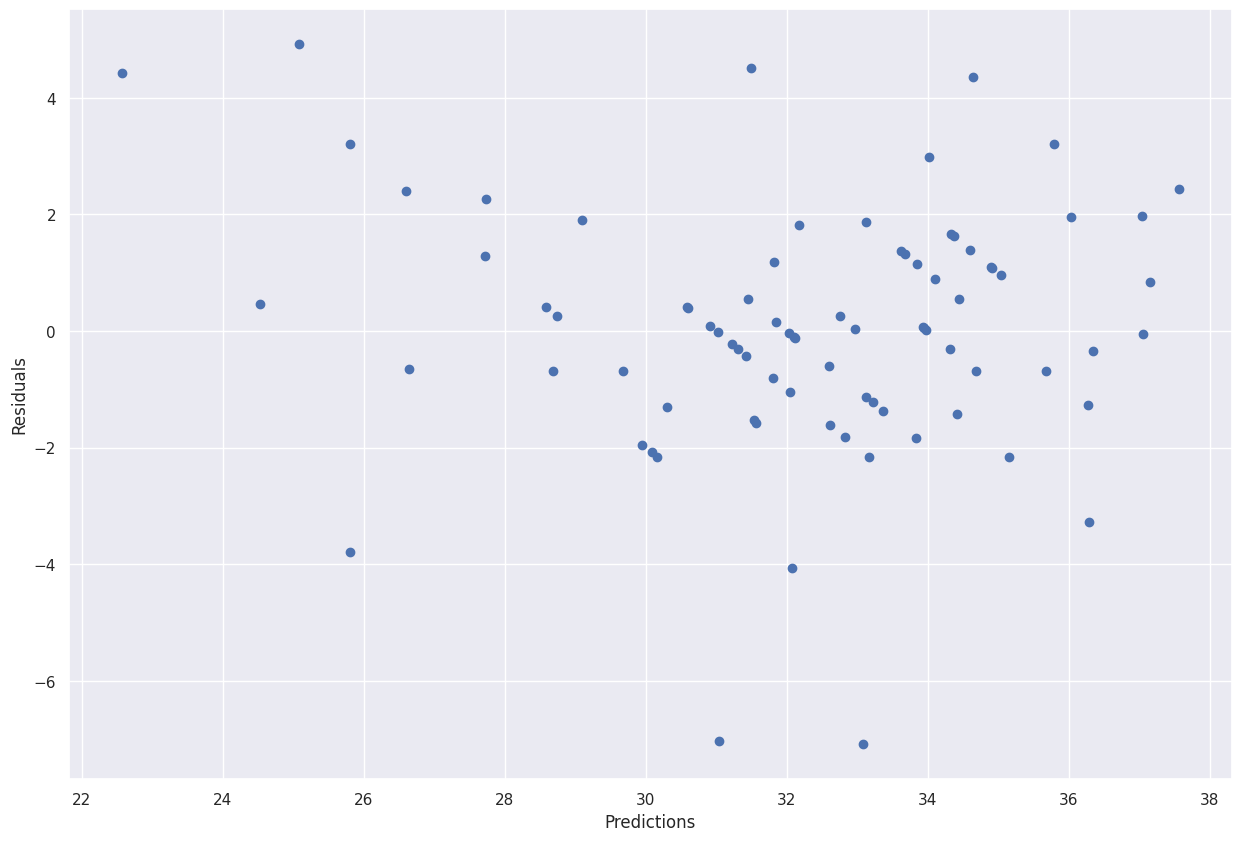

In [281]:
plt.scatter(x=ridge_reg_pred, y=residual_ridge_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

In [282]:
print(f"MSE: {round(mean_squared_error(y_test, ridge_reg_pred), 2)}")
print(f"MAE: {round(mean_absolute_error(y_test, ridge_reg_pred), 2)}")
print(f"RMSE: {round(np.sqrt(mean_squared_error(y_test, ridge_reg_pred)), 2)}")


MSE: 4.47
MAE: 1.52
RMSE: 2.11


In [283]:
ridge_reg_r2_score = r2_score(y_test, ridge_reg_pred)
ridge_reg_adj_r2_score = 1 - ((1 - ridge_reg_r2_score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

print(f"R-Squared Accuracy: {round(ridge_reg_r2_score * 100, 3)}%")
print(f"Adjusted R-Squared Accuracy: {round(ridge_reg_adj_r2_score * 100, 2)}%")


R-Squared Accuracy: 65.173%
Adjusted R-Squared Accuracy: 59.62%


In [284]:
lasso_reg=Lasso()
lasso_reg

Lasso()

In [285]:
lasso_reg.fit(X_train, y_train)

Lasso()

In [286]:
print("1. Co-efficients of independent features is {}".format(lasso_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(lasso_reg.intercept_))

1. Co-efficients of independent features is [-0.72503348 -0.         -0.          0.87643305  0.          0.
  0.          0.          0.          0.          0.4291335 ]
2. Intercept of best fit hyper plane is [32.09876543]


In [287]:
lasso_reg_pred=lasso_reg.predict(X_test)

In [288]:
y_test = y_test.squeeze()
residual_lasso_reg = y_test-lasso_reg_pred
residual_lasso_reg = pd.DataFrame(residual_lasso_reg)

Text(0, 0.5, 'Predicted data')

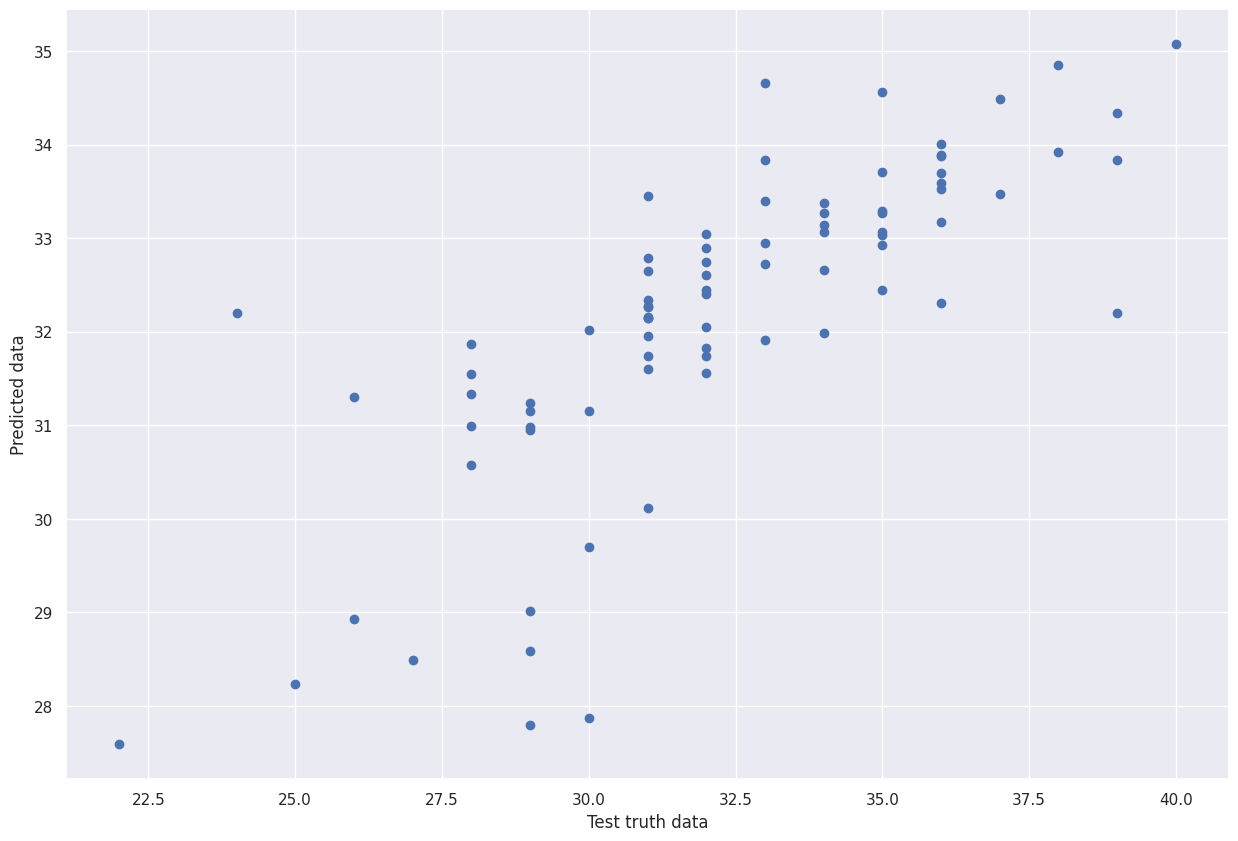

In [289]:
plt.scatter(x=y_test,y=lasso_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

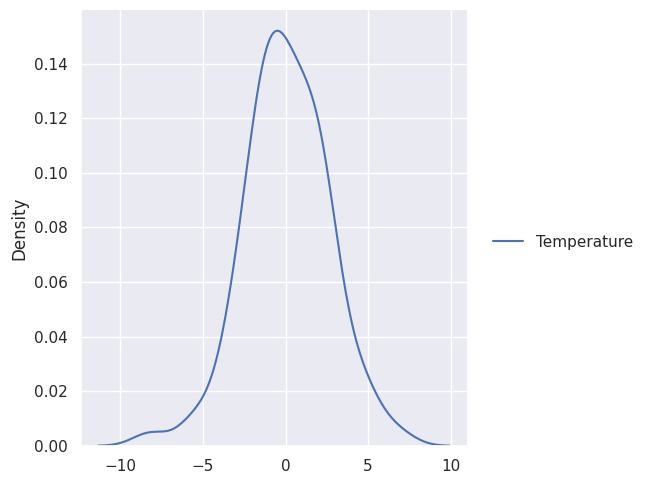

In [290]:
sns.displot( data = residual_lasso_reg, kind='kde')

Text(0, 0.5, 'Residuals')

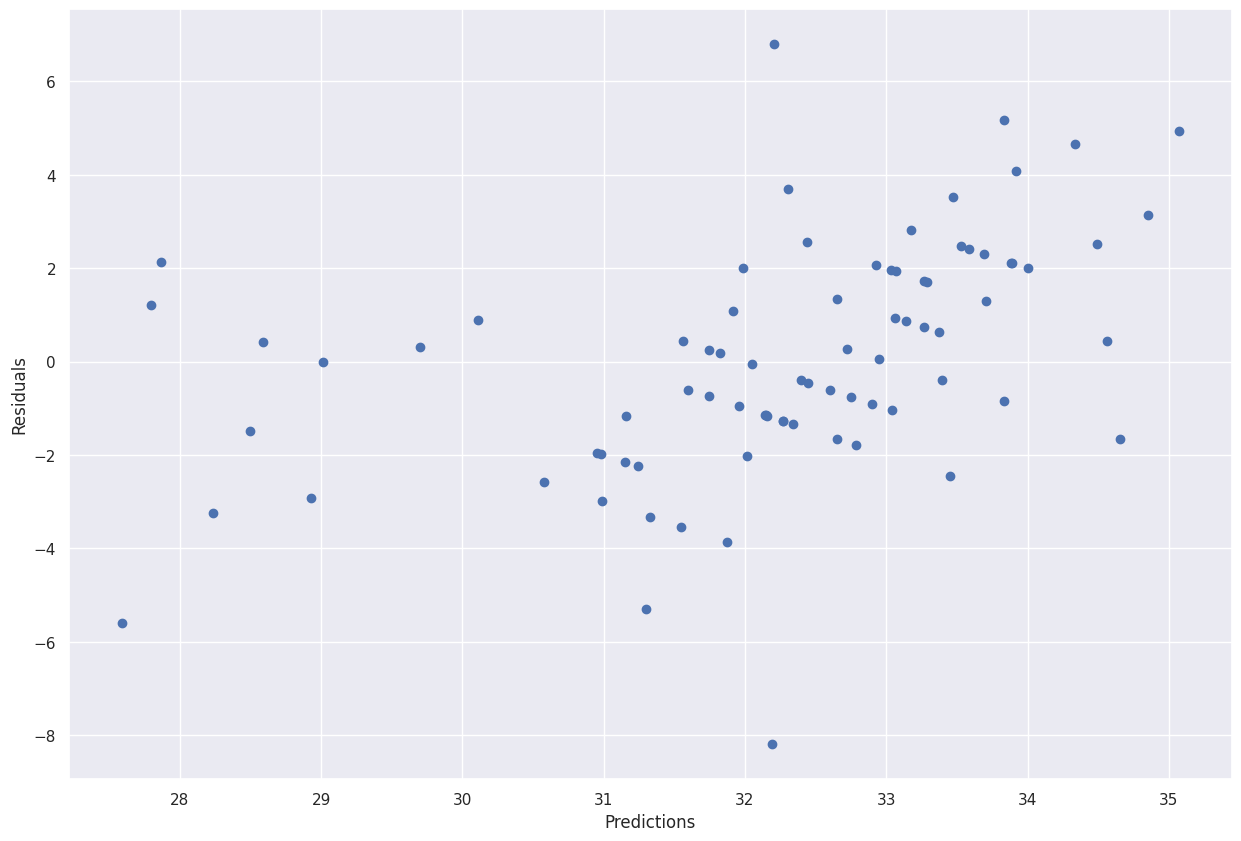

In [291]:
plt.scatter(x=lasso_reg_pred, y=residual_lasso_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

In [292]:
print(f"MSE: {round(mean_squared_error(y_test, lasso_reg_pred), 2)}")
print(f"MAE: {round(mean_absolute_error(y_test, lasso_reg_pred), 2)}")
print(f"RMSE: {round(np.sqrt(mean_squared_error(y_test, lasso_reg_pred)), 2)}")


MSE: 6.34
MAE: 1.97
RMSE: 2.52


In [293]:
lasso_reg_r2_score = r2_score(y_test, lasso_reg_pred)
lasso_reg_adj_r2_score = 1 - ((1 - lasso_reg_r2_score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

print(f"R-Squared Accuracy: {round(lasso_reg_r2_score * 100, 3)}%")
print(f"Adjusted R-Squared Accuracy: {round(lasso_reg_adj_r2_score * 100, 2)}%")


R-Squared Accuracy: 50.602%
Adjusted R-Squared Accuracy: 42.73%


In [294]:
elastic_reg=ElasticNet()
elastic_reg

ElasticNet()

In [295]:
elastic_reg.fit(X_train, y_train)

ElasticNet()

In [296]:
print("1. Coefficients of independent features: {}".format(elastic_reg.coef_))
print("2. Intercept of the best-fit hyperplane: {}".format(elastic_reg.intercept_))


1. Coefficients of independent features: [-0.67116578 -0.22866861 -0.          0.66705059  0.00146548  0.22303476
  0.          0.13733014  0.05539498  0.          0.58864273]
2. Intercept of the best-fit hyperplane: [32.09876543]


In [297]:
elastic_reg_pred=elastic_reg.predict(X_test)

In [298]:
residual_elastic_reg=y_test-elastic_reg_pred
residual_elastic_reg = pd.DataFrame(residual_elastic_reg)

Text(0, 0.5, 'Predicted data')

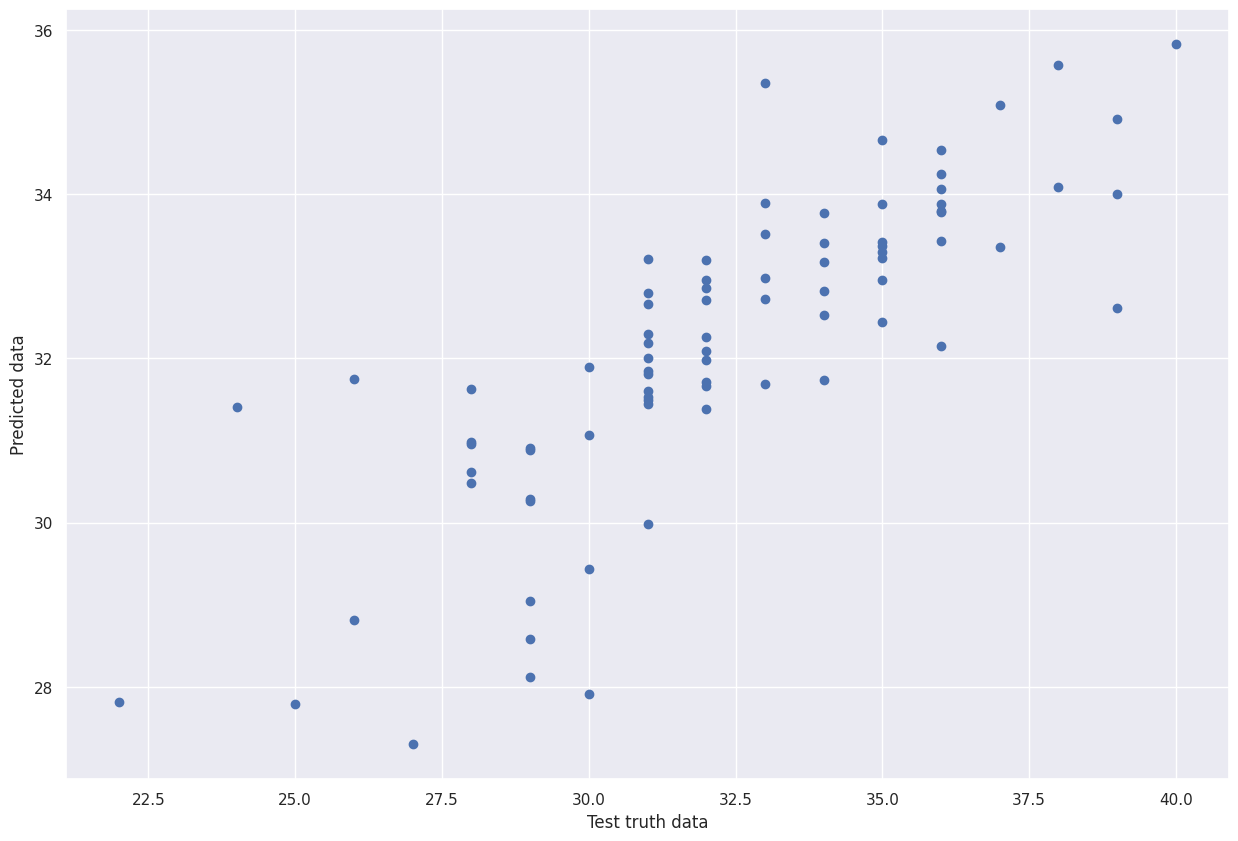

In [299]:
plt.scatter(x=y_test,y=elastic_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

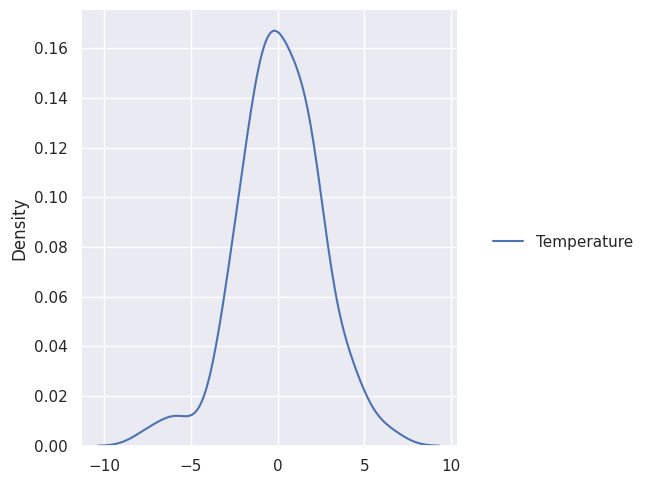

In [300]:
sns.displot( data = residual_elastic_reg, kind='kde')

Text(0, 0.5, 'Residuals')

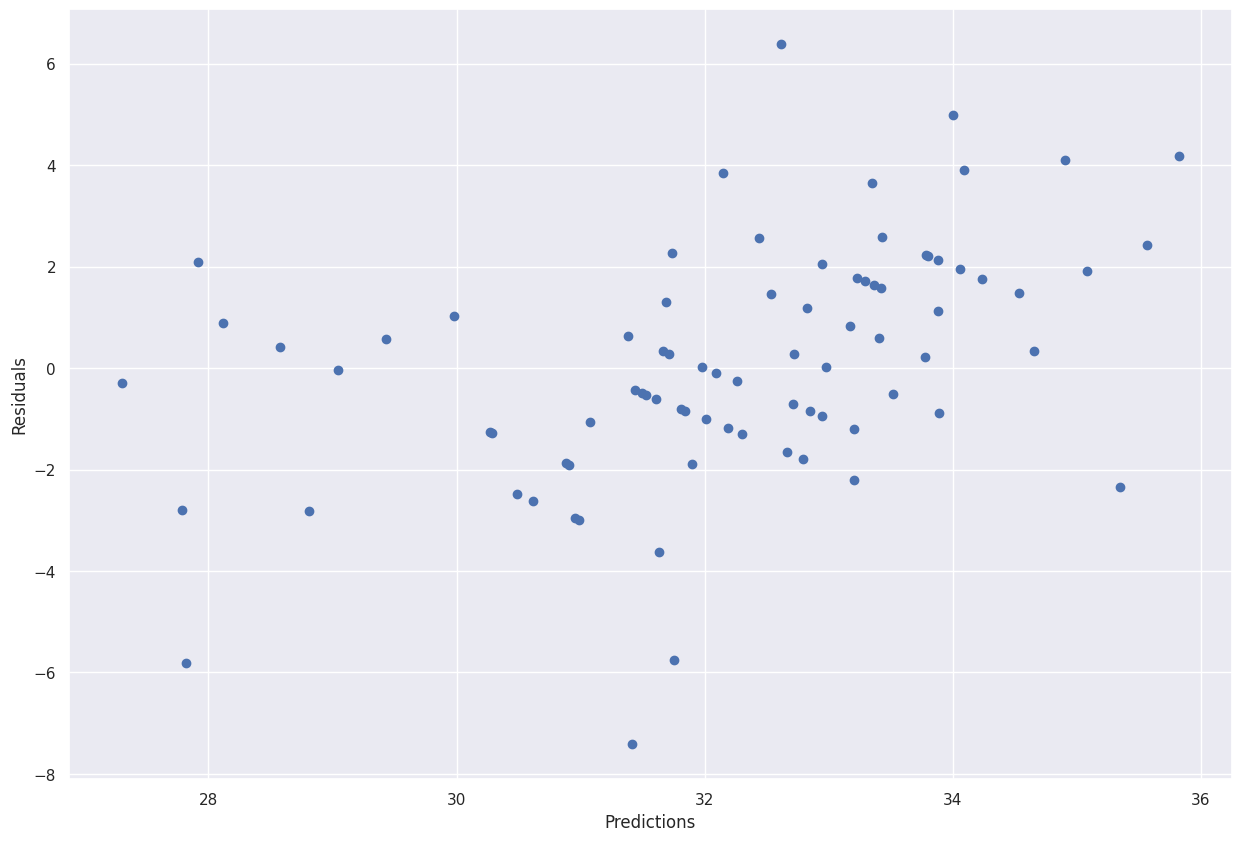

In [301]:
plt.scatter(x=elastic_reg_pred, y=residual_elastic_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

In [302]:
print(f"MSE: {round(mean_squared_error(y_test, elastic_reg_pred), 2)}")
print(f"MAE: {round(mean_absolute_error(y_test, elastic_reg_pred), 2)}")
print(f"RMSE: {round(np.sqrt(mean_squared_error(y_test, elastic_reg_pred)), 2)}")


MSE: 5.55
MAE: 1.81
RMSE: 2.36


In [303]:
elastic_reg_r2_score = r2_score(y_test, elastic_reg_pred)
elastic_reg_adj_r2_score = 1 - ((1 - elastic_reg_r2_score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

print(f"R-Squared Accuracy: {round(elastic_reg_r2_score * 100, 3)}%")
print(f"Adjusted R-Squared Accuracy: {round(elastic_reg_adj_r2_score * 100, 2)}%")


R-Squared Accuracy: 56.776%
Adjusted R-Squared Accuracy: 49.88%


In [304]:
print("--------------------------------------")
print(f"MSE:")
print(f"1. Linear Regression: {round(mean_squared_error(y_test, linear_reg_pred), 2)}")
print(f"2. Ridge Regression: {round(mean_squared_error(y_test, ridge_reg_pred), 2)}")
print(f"3. Lasso Regression: {round(mean_squared_error(y_test, lasso_reg_pred), 2)}")
print(f"4. Elastic Net Regression: {round(mean_squared_error(y_test, elastic_reg_pred), 2)}")

print("--------------------------------------")
print(f"MAE:")
print(f"1. Linear Regression: {round(mean_absolute_error(y_test, linear_reg_pred), 2)}")
print(f"2. Ridge Regression: {round(mean_absolute_error(y_test, ridge_reg_pred), 2)}")
print(f"3. Lasso Regression: {round(mean_absolute_error(y_test, lasso_reg_pred), 2)}")
print(f"4. Elastic Net Regression: {round(mean_absolute_error(y_test, elastic_reg_pred), 2)}")

print("--------------------------------------")
print(f"RMSE:")
print(f"1. Linear Regression: {round(np.sqrt(mean_squared_error(y_test, linear_reg_pred)), 2)}")
print(f"2. Ridge Regression: {round(np.sqrt(mean_squared_error(y_test, ridge_reg_pred)), 2)}")
print(f"3. Lasso Regression: {round(np.sqrt(mean_squared_error(y_test, lasso_reg_pred)), 2)}")
print(f"4. Elastic Net Regression: {round(np.sqrt(mean_squared_error(y_test, elastic_reg_pred)), 2)}")

print("--------------------------------------")


--------------------------------------
MSE:
1. Linear Regression: 4.48
2. Ridge Regression: 4.47
3. Lasso Regression: 6.34
4. Elastic Net Regression: 5.55
--------------------------------------
MAE:
1. Linear Regression: 1.52
2. Ridge Regression: 1.52
3. Lasso Regression: 1.97
4. Elastic Net Regression: 1.81
--------------------------------------
RMSE:
1. Linear Regression: 2.12
2. Ridge Regression: 2.11
3. Lasso Regression: 2.52
4. Elastic Net Regression: 2.36
--------------------------------------


In [305]:
print("--------------------------------------")
print("R-Squared Accuracy:")
print(f"1. Linear Regression: {round(linear_reg_r2_score * 100, 3)} %")
print(f"2. Ridge Regression: {round(ridge_reg_r2_score * 100, 3)} %")
print(f"3. Lasso Regression: {round(lasso_reg_r2_score * 100, 3)} %")
print(f"4. Elastic Net Regression: {round(elastic_reg_r2_score * 100, 3)} %")

print("--------------------------------------")
print("Adjusted R-Squared Accuracy:")
print(f"1. Linear Regression: {round(linear_reg_adj_r2_score * 100, 3)} %")
print(f"2. Ridge Regression: {round(ridge_reg_adj_r2_score * 100, 3)} %")
print(f"3. Lasso Regression: {round(lasso_reg_adj_r2_score * 100, 3)} %")
print(f"4. Elastic Net Regression: {round(elastic_reg_adj_r2_score * 100, 3)} %")

print("--------------------------------------")


--------------------------------------
R-Squared Accuracy:
1. Linear Regression: 65.086 %
2. Ridge Regression: 65.173 %
3. Lasso Regression: 50.602 %
4. Elastic Net Regression: 56.776 %
--------------------------------------
Adjusted R-Squared Accuracy:
1. Linear Regression: 59.52 %
2. Ridge Regression: 59.621 %
3. Lasso Regression: 42.726 %
4. Elastic Net Regression: 49.885 %
--------------------------------------
